<a href="https://colab.research.google.com/github/yayanhidayaat/klasifikasi/blob/main/Muhammad_Nur_Hidayat_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Instal kaggle dan setup
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"yayanhidayaat","key":"ff230f6f2e69e8017456bb13ab6333a9"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset riceleafs
!kaggle datasets download -d shayanriyaz/riceleafs
!unzip riceleafs.zip -d /content/riceleafs


Streaming output truncated to the last 5000 lines.
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144628.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: /content/riceleafs/RiceLeafs/train/Hispa/IMG_20190419_14

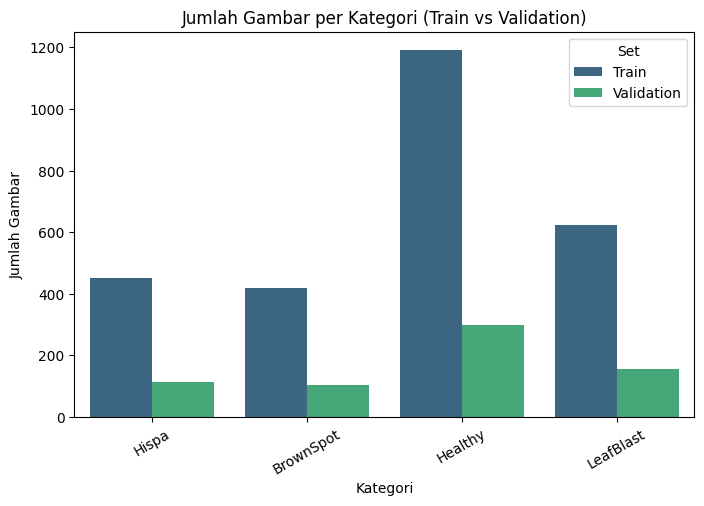


ðŸ“Œ Jumlah Gambar per Kategori:
    Category  Total Images
0  LeafBlast           779
1    Healthy          1488
2  BrownSpot           523
3      Hispa           565

ðŸ“Œ Total Keseluruhan Gambar dalam Dataset: 3355


In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_dir = "/content/riceleafs/RiceLeafs"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "validation")
def count_images_in_folders(base_dir):
    categories = os.listdir(base_dir)  # Dapatkan daftar kategori
    counts = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}
    return counts
train_counts = count_images_in_folders(train_dir)
val_counts = count_images_in_folders(val_dir)

# Konversi ke DataFrame untuk visualisasi
df_train = pd.DataFrame(list(train_counts.items()), columns=["Category", "Count"])
df_train["Set"] = "Train"

df_val = pd.DataFrame(list(val_counts.items()), columns=["Category", "Count"])
df_val["Set"] = "Validation"

# Gabungkan kedua DataFrame
df = pd.concat([df_train, df_val])

plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Count", hue="Set", data=df, palette="viridis")

# Tambahkan judul dan label
plt.title("Jumlah Gambar per Kategori (Train vs Validation)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=30)  # Miringkan teks kategori agar lebih terbaca

# Tampilkan plot
plt.show()

# Gabungkan jumlah gambar dari Train dan Validation
total_counts = {category: train_counts.get(category, 0) + val_counts.get(category, 0)
                for category in set(train_counts) | set(val_counts)}

# Konversi ke DataFrame
df_summary = pd.DataFrame(total_counts.items(), columns=["Category", "Total Images"])
print("\nðŸ“Œ Jumlah Gambar per Kategori:")
print(df_summary)

# Hitung total keseluruhan gambar dalam dataset
total_images = sum(total_counts.values())
print("\nðŸ“Œ Total Keseluruhan Gambar dalam Dataset:", total_images)



ðŸ”„ Oversampling untuk kategori: Hispa (Jumlah awal: 452, Target: 1191)


ðŸ”¹ Augmenting Hispa: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 739/739 [20:54<00:00,  1.70s/it]



ðŸ”„ Oversampling untuk kategori: BrownSpot (Jumlah awal: 418, Target: 1191)


ðŸ”¹ Augmenting BrownSpot: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 773/773 [21:03<00:00,  1.64s/it]



ðŸ”„ Oversampling untuk kategori: LeafBlast (Jumlah awal: 623, Target: 1191)


ðŸ”¹ Augmenting LeafBlast: 100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 568/568 [11:30<00:00,  1.22s/it]


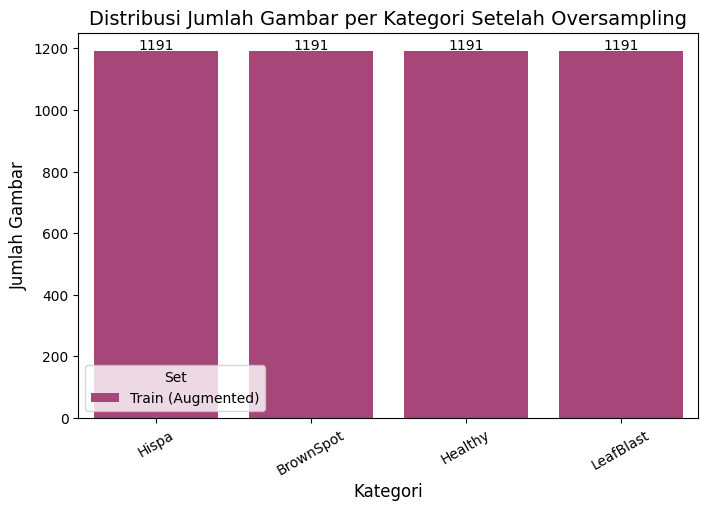

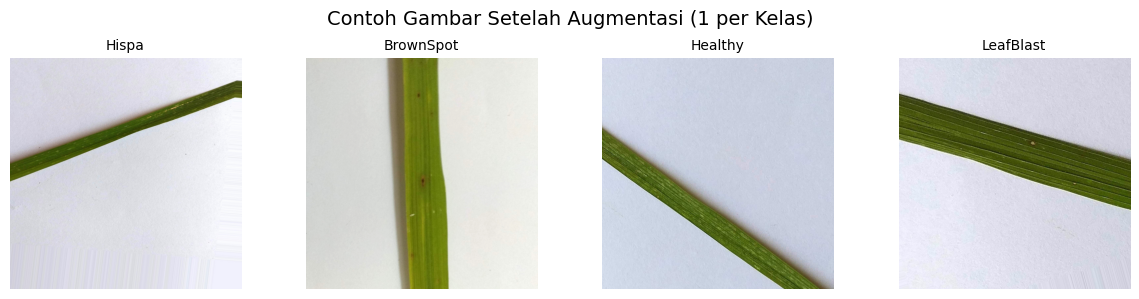

In [5]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import save_img

# Path dataset
data_dir = "/content/riceleafs/RiceLeafs"
train_dir = os.path.join(data_dir, "train")

# Fungsi menghitung jumlah gambar dalam setiap kategori
def count_images_in_folders(base_dir):
    categories = os.listdir(base_dir)  # Dapatkan daftar kategori
    counts = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}
    return counts

# Hitung jumlah gambar dalam train set
train_counts = count_images_in_folders(train_dir)

# Cari jumlah maksimum gambar di kategori terpadat untuk target oversampling
max_images = max(train_counts.values())

# ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fungsi augmentasi untuk menyeimbangkan jumlah gambar per kelas
def augment_data(category, target_count):
    category_path = os.path.join(train_dir, category)
    images = os.listdir(category_path)

    print(f"\nðŸ”„ Oversampling untuk kategori: {category} (Jumlah awal: {len(images)}, Target: {target_count})")

    progress_bar = tqdm(total=target_count - len(images), desc=f"ðŸ”¹ Augmenting {category}")

    while len(os.listdir(category_path)) < target_count:
        img_name = random.choice(images)  # Pilih gambar acak
        img_path = os.path.join(category_path, img_name)

        # Load gambar dan ubah ke array
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Generate gambar augmented
        aug_iter = datagen.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0].astype('uint8')

        # Simpan gambar hasil augmentasi
        new_img_name = f"aug_{len(os.listdir(category_path))}.jpg"
        save_img(os.path.join(category_path, new_img_name), aug_img)

        # Update progress bar
        progress_bar.update(1)

    progress_bar.close()

# Lakukan augmentasi untuk kategori yang jumlahnya kurang dari max_images
for category, count in train_counts.items():
    if count < max_images:
        augment_data(category, max_images)

# Hitung ulang jumlah gambar setelah augmentasi
train_counts_after = count_images_in_folders(train_dir)

# Plot ulang jumlah gambar setelah augmentasi
df_train_after = pd.DataFrame(list(train_counts_after.items()), columns=["Category", "Count"])
df_train_after["Set"] = "Train (Augmented)"

plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Count", hue="Set", data=df_train_after, palette="magma")

# Tambahkan judul dan label
plt.title("Distribusi Jumlah Gambar per Kategori Setelah Oversampling", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30)

# Tampilkan angka di atas setiap batang
for i in range(len(df_train_after)):
    plt.text(i, df_train_after.iloc[i, 1] + 5, df_train_after.iloc[i, 1], ha='center', fontsize=10)

plt.show()

# Menampilkan contoh 1 gambar per kelas setelah augmentasi dalam satu baris
num_categories = len(train_counts)  # Jumlah kategori
fig, axes = plt.subplots(1, num_categories, figsize=(num_categories * 3, 3))  # Lebar gambar disesuaikan

for i, category in enumerate(train_counts.keys()):
    category_path = os.path.join(train_dir, category)
    sample_img_name = random.choice(os.listdir(category_path))  # Pilih gambar acak dari kategori
    sample_img = load_img(os.path.join(category_path, sample_img_name))

    axes[i].imshow(sample_img)
    axes[i].set_title(category, fontsize=10)
    axes[i].axis("off")

plt.suptitle("Contoh Gambar Setelah Augmentasi (1 per Kelas)", fontsize=14)
plt.tight_layout()
plt.show()


In [6]:
# import shutil

# # Simpan dataset sebagai zip file
# output_zip = "/content/riceleafs_augmented.zip"
# shutil.make_archive(output_zip.replace(".zip", ""), 'zip', "/content/riceleafs/RiceLeafs")

# print(f"âœ… Dataset telah disimpan di: {output_zip}")


In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Salin zip ke Google Drive
# shutil.copy(output_zip, "/content/drive/MyDrive/riceleafs_augmented.zip")
# print("âœ… Dataset telah disimpan di Google Drive!")


In [9]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

# Path dataset
DATASET_PATH = "/content/riceleafs/RiceLeafs/train"
GDRIVE_PATH = "/content/drive/MyDrive/mobilenetv2_riceleafs/"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_FOLDS = min(5, num_classes)

# Buat folder jika belum ada
os.makedirs(GDRIVE_PATH, exist_ok=True)

# Data Generator dengan validation split
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# K-Fold Cross Validation
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)

# Dapatkan daftar folder kelas
class_names = os.listdir(DATASET_PATH)
num_classes = len(class_names)

fold_no = 1
all_histories = []
all_accuracies = []

for train_index, val_index in kf.split(class_names):
    print(f"Training Fold {fold_no}...")

    # Data Generator untuk fold ini
    train_generator = data_gen.flow_from_directory(
        DATASET_PATH,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_generator = data_gen.flow_from_directory(
        DATASET_PATH,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    # Load model MobileNetV2
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Bekukan base model

    # Tambahkan layer kustom
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # Buat model
    model = Model(inputs=base_model.input, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS,
        verbose=1
    )

    all_histories.append(history.history)
    all_accuracies.append(max(history.history['val_accuracy']))

    # Simpan model untuk setiap fold ke Google Drive
    model.save(f"{GDRIVE_PATH}mobilenetv2_riceleafs_fold{fold_no}.h5")
    print(f"âœ… Model untuk Fold {fold_no} telah disimpan di Google Drive!")

    fold_no += 1

# Rata-rata akurasi dari 5-Fold
mean_accuracy = np.mean(all_accuracies)
print(f"Rata-rata Akurasi dari {NUM_FOLDS}-Fold Cross Validation: {mean_accuracy:.4f}")

# Visualisasi hasil training
def plot_learning_curves(histories, num_folds):
    plt.figure(figsize=(12, 5))

    for i, history in enumerate(histories):
        plt.subplot(1, 2, 1)
        plt.plot(history['accuracy'], label=f'Fold {i+1}')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history['val_accuracy'], label=f'Fold {i+1}')
        plt.title('Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.show()

plot_learning_curves(all_histories, NUM_FOLDS)



NameError: name 'num_classes' is not defined